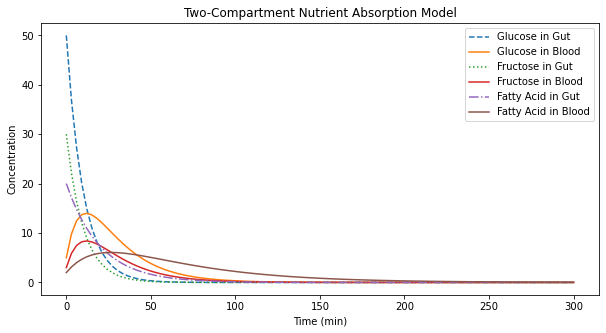

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
from dataclasses import dataclass
import matplotlib.pyplot as plt

@dataclass
class GlucoseModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

@dataclass
class FructoseModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

@dataclass
class FattyAcidModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

"""@dataclass
class ProteinModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)"""

def glucose_two_compartment(t, y, params):
    G_gut, G_blood = y
    dG_gut_dt = -(params.k_abs * G_gut * params.V_gut) / params.V_gut
    dG_blood_dt = ((params.k_abs * G_gut * params.V_gut) - (params.k_clear * G_blood * params.V_blood)) / params.V_blood
    return [dG_gut_dt, dG_blood_dt]

def fructose_two_compartment(t, y, params):
    F_gut, F_blood = y
    dF_gut_dt = -(params.k_abs * F_gut * params.V_gut) / params.V_gut
    dF_blood_dt = ((params.k_abs * F_gut * params.V_gut) - (params.k_clear * F_blood * params.V_blood)) / params.V_blood
    return [dF_gut_dt, dF_blood_dt]

def fatty_acid_two_compartment(t, y, params):
    FA_gut, FA_blood = y
    dFA_gut_dt = -(params.k_abs * FA_gut * params.V_gut) / params.V_gut
    dFA_blood_dt = ((params.k_abs * FA_gut * params.V_gut) - (params.k_clear * FA_blood * params.V_blood)) / params.V_blood
    return [dFA_gut_dt, dFA_blood_dt]

"""def protein_two_compartment(t, y, params):
    P_gut, P_blood = y
    dP_gut_dt = -(params.k_abs * P_gut * params.V_gut) / params.V_gut
    dP_blood_dt = ((params.k_abs * P_gut * params.V_gut) - (params.k_clear * P_blood * params.V_blood)) / params.V_blood
    return [dP_gut_dt, dP_blood_dt]
"""
# Define parameters
glucose_params = GlucoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.25, V_blood=2.75)
fructose_params = FructoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.25, V_blood=2.75)
fatty_acid_params = FattyAcidModelParams(k_abs=0.05, k_clear=0.02, V_gut=1.25, V_blood=2.75)
protein_params = ProteinModelParams(k_abs=0.08, k_clear=0.03, V_gut=1.25, V_blood=52.75)

# Initial conditions
glucose_y0 = [50, 5]  # Glucose in gut and blood (mmol)
fructose_y0 = [30, 3]  # Fructose in gut and blood (mmol)
fatty_acid_y0 = [20, 2]  # Fatty acid in gut and blood (mmol)
#protein_y0 = [40, 4]  # Protein in gut and blood (mmol)

# Time span for simulation
t_span = (0, 300)
t_eval = np.linspace(*t_span, 100)

# Solve ODEs
glucose_solution = solve_ivp(glucose_two_compartment, t_span, glucose_y0, t_eval=t_eval, args=(glucose_params,))
fructose_solution = solve_ivp(fructose_two_compartment, t_span, fructose_y0, t_eval=t_eval, args=(fructose_params,))
fatty_acid_solution = solve_ivp(fatty_acid_two_compartment, t_span, fatty_acid_y0, t_eval=t_eval, args=(fatty_acid_params,))
#protein_solution = solve_ivp(protein_two_compartment, t_span, protein_y0, t_eval=t_eval, args=(protein_params,))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(glucose_solution.t, glucose_solution.y[0], label='Glucose in Gut', linestyle='dashed')
plt.plot(glucose_solution.t, glucose_solution.y[1], label='Glucose in Blood')
plt.plot(fructose_solution.t, fructose_solution.y[0], label='Fructose in Gut', linestyle='dotted')
plt.plot(fructose_solution.t, fructose_solution.y[1], label='Fructose in Blood')
plt.plot(fatty_acid_solution.t, fatty_acid_solution.y[0], label='Fatty Acid in Gut', linestyle='dashdot')
plt.plot(fatty_acid_solution.t, fatty_acid_solution.y[1], label='Fatty Acid in Blood')
#plt.plot(protein_solution.t, protein_solution.y[0], label='Protein in Gut', linestyle='solid')
#plt.plot(protein_solution.t, protein_solution.y[1], label='Protein in Blood')
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.title('Two-Compartment Nutrient Absorption Model')
plt.legend()
plt.show()


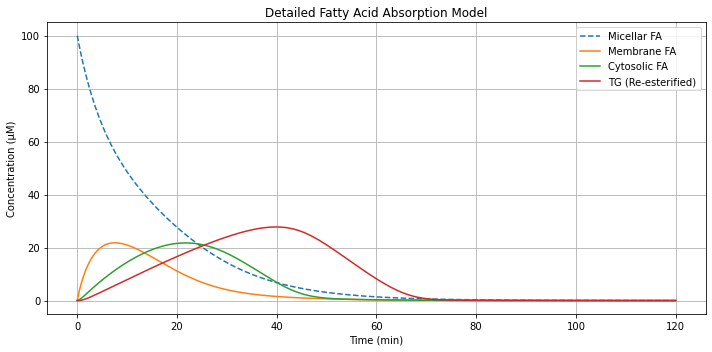

In [1]:
from dataclasses import dataclass

@dataclass
class FattyAcidDetailedModelParams:
    P_uwl: float           # µM/min, diffusion from micelle to membrane
    Vmax_trans: float      # µM/min, transporter-mediated uptake
    Km_trans: float        # µM
    Vmax_reester: float    # µM/min
    Km_reester: float      # µM
    Vmax_export: float     # µM/min
    Km_export: float       # µM

def fatty_acid_detailed_model(t, y, params):
    FA_mic, FA_mem, FA_cyto, TG_cyto = y

    # Step 1: Micelle to membrane diffusion
    J_diff = params.P_uwl * (FA_mic - FA_mem)

    # Step 2: Carrier-mediated transport across membrane
    J_trans = (params.Vmax_trans * FA_mem) / (params.Km_trans + FA_mem + 1e-6)

    # Step 3: Intracellular re-esterification
    J_reester = (params.Vmax_reester * FA_cyto) / (params.Km_reester + FA_cyto + 1e-6)

    # Step 4: Export via chylomicrons
    J_export = (params.Vmax_export * TG_cyto) / (params.Km_export + TG_cyto + 1e-6)

    dFA_mic_dt = -J_diff
    dFA_mem_dt = J_diff - J_trans
    dFA_cyto_dt = J_trans - J_reester
    dTG_cyto_dt = J_reester - J_export

    return [dFA_mic_dt, dFA_mem_dt, dFA_cyto_dt, dTG_cyto_dt]

# Parameters
fatty_params = FattyAcidDetailedModelParams(
    P_uwl=0.1,
    Vmax_trans=5.0,
    Km_trans=10.0,
    Vmax_reester=3.0,
    Km_reester=5.0,
    Vmax_export=2.0,
    Km_export=4.0
)

# Initial concentrations [µM]
FA_y0 = [100.0, 0.0, 0.0, 0.0]  # Micelle, Membrane, Cytosol, TG

# Simulate over time
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

t_span = (0, 120)
t_eval = np.linspace(*t_span, 300)

solution = solve_ivp(fatty_acid_detailed_model, t_span, FA_y0, t_eval=t_eval, args=(fatty_params,))

# Plot
FA_mic, FA_mem, FA_cyto, TG_cyto = solution.y

plt.figure(figsize=(10, 5))
plt.plot(solution.t, FA_mic, label='Micellar FA', linestyle='dashed')
plt.plot(solution.t, FA_mem, label='Membrane FA')
plt.plot(solution.t, FA_cyto, label='Cytosolic FA')
plt.plot(solution.t, TG_cyto, label='TG (Re-esterified)')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (µM)')
plt.title('Detailed Fatty Acid Absorption Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


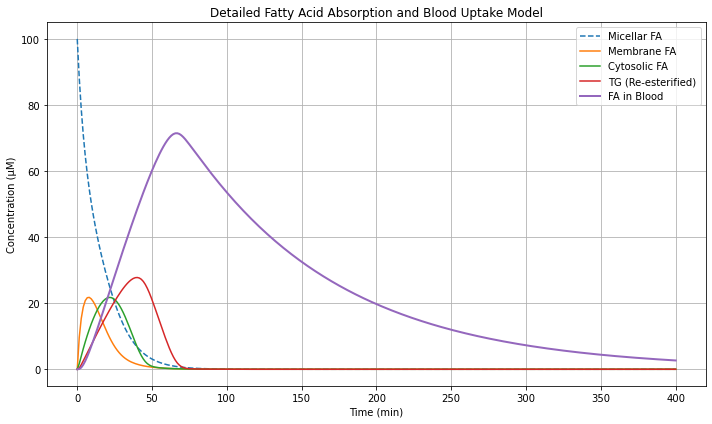

In [4]:
@dataclass
class FattyAcidFullModelParams:
    P_uwl: float
    Vmax_trans: float
    Km_trans: float
    Vmax_reester: float
    Km_reester: float
    Vmax_export: float
    Km_export: float
    k_clear: float        # clearance from plasma(e.g. uptake by tissues)

        
def fatty_acid_full_model(t, y, params):
    FA_mic, FA_mem, FA_cyto, TG_cyto, FA_blood = y

    # Step 1: Micelle to membrane
    J_diff = params.P_uwl * (FA_mic - FA_mem)

    # Step 2: Transport into cytosol
    J_trans = (params.Vmax_trans * FA_mem) / (params.Km_trans + FA_mem + 1e-6)

    # Step 3: Re-esterification
    J_reester = (params.Vmax_reester * FA_cyto) / (params.Km_reester + FA_cyto + 1e-6)

    # Step 4: Export
    J_export = (params.Vmax_export * TG_cyto) / (params.Km_export + TG_cyto + 1e-6)

    # Step 5: Blood clearance
    J_clear = params.k_clear * FA_blood

    dFA_mic_dt = -J_diff
    dFA_mem_dt = J_diff - J_trans
    dFA_cyto_dt = J_trans - J_reester
    dTG_cyto_dt = J_reester - J_export
    dFA_blood_dt = J_export - J_clear

    return [dFA_mic_dt, dFA_mem_dt, dFA_cyto_dt, dTG_cyto_dt, dFA_blood_dt]
# Define parameters
fatty_params = FattyAcidFullModelParams(
    P_uwl=0.1,
    Vmax_trans=5.0,
    Km_trans=10.0,
    Vmax_reester=3.0,
    Km_reester=5.0,
    Vmax_export=2.0,
    Km_export=4.0,
    k_clear=0.01
)

# Initial conditions: [Micelle, Membrane, Cytosol FA, TG, Blood FA]
FA_y0 = [100.0, 0.0, 0.0, 0.0, 0.0]

# Simulate
t_span = (0, 400)
t_eval = np.linspace(*t_span, 300)

solution = solve_ivp(fatty_acid_full_model, t_span, FA_y0, t_eval=t_eval, args=(fatty_params,))
FA_mic, FA_mem, FA_cyto, TG_cyto, FA_blood = solution.y

# Plot
plt.figure(figsize=(10, 6))
plt.plot(solution.t, FA_mic, label='Micellar FA', linestyle='dashed')
plt.plot(solution.t, FA_mem, label='Membrane FA')
plt.plot(solution.t, FA_cyto, label='Cytosolic FA')
plt.plot(solution.t, TG_cyto, label='TG (Re-esterified)')
plt.plot(solution.t, FA_blood, label='FA in Blood', linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (µM)')
plt.title('Detailed Fatty Acid Absorption and Blood Uptake Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



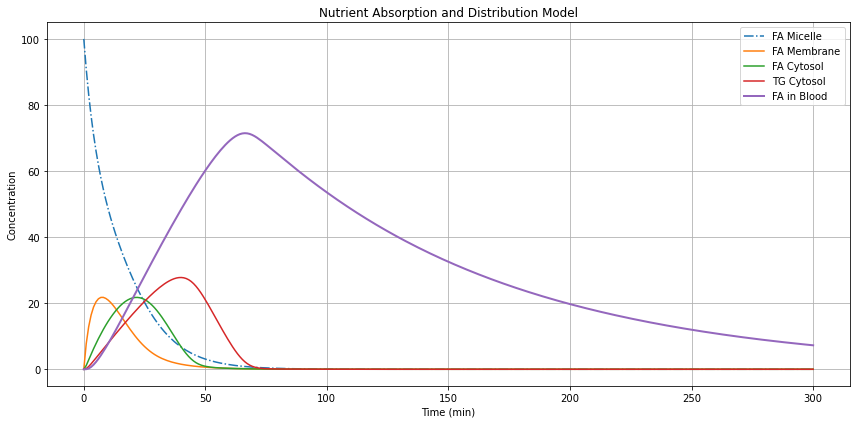

In [1]:
from dataclasses import dataclass
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# data classes

@dataclass
class GlucoseModelParams:
    k_abs: float
    k_clear: float
    V_gut: float
    V_blood: float

@dataclass
class FructoseModelParams:
    k_abs: float
    k_clear: float
    V_gut: float
    V_blood: float

@dataclass
class FattyAcidFullModelParams:
    P_uwl: float
    Vmax_trans: float
    Km_trans: float
    Vmax_reester: float
    Km_reester: float
    Vmax_export: float
    Km_export: float
    k_clear: float  # Clearance from blood

#ODE Models

def glucose_two_compartment(t, y, params):
    G_gut, G_blood = y
    dG_gut_dt = -(params.k_abs * G_gut * params.V_gut) / params.V_gut
    dG_blood_dt = ((params.k_abs * G_gut * params.V_gut) - (params.k_clear * G_blood * params.V_blood)) / params.V_blood
    return [dG_gut_dt, dG_blood_dt]

def fructose_two_compartment(t, y, params):
    F_gut, F_blood = y
    dF_gut_dt = -(params.k_abs * F_gut * params.V_gut) / params.V_gut
    dF_blood_dt = ((params.k_abs * F_gut * params.V_gut) - (params.k_clear * F_blood * params.V_blood)) / params.V_blood
    return [dF_gut_dt, dF_blood_dt]

def fatty_acid_full_model(t, y, params):
    FA_mic, FA_mem, FA_cyto, TG_cyto, FA_blood = y

    # Mechanistic flows
    J_diff = params.P_uwl * (FA_mic - FA_mem)
    J_trans = (params.Vmax_trans * FA_mem) / (params.Km_trans + FA_mem + 1e-6) #1e-6 is a safegaurd to prevent division by 0
    J_reester = (params.Vmax_reester * FA_cyto) / (params.Km_reester + FA_cyto + 1e-6)
    J_export = (params.Vmax_export * TG_cyto) / (params.Km_export + TG_cyto + 1e-6)
    J_clear = params.k_clear * FA_blood

    dFA_mic_dt = -J_diff
    dFA_mem_dt = J_diff - J_trans
    dFA_cyto_dt = J_trans - J_reester
    dTG_cyto_dt = J_reester - J_export
    dFA_blood_dt = J_export - J_clear

    return [dFA_mic_dt, dFA_mem_dt, dFA_cyto_dt, dTG_cyto_dt, dFA_blood_dt]

#Parameters

glucose_params = GlucoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.25, V_blood=2.75)
fructose_params = FructoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.25, V_blood=2.75)
fatty_params = FattyAcidFullModelParams(
    P_uwl=0.1,
    Vmax_trans=5.0,
    Km_trans=10.0,
    Vmax_reester=3.0,
    Km_reester=5.0,
    Vmax_export=2.0,
    Km_export=4.0,
    k_clear=0.01
)
#guesses of parameters for FA, i dont think this is physiologically accurate

#Initial Conditions

glucose_y0 = [50, 5]
fructose_y0 = [30, 3]
fatty_acid_y0 = [100.0, 0.0, 0.0, 0.0, 0.0]  # Micelle, Membrane, Cytosol, TG, Blood

#Simulation Setup

t_span = (0, 300)
t_eval = np.linspace(*t_span, 300)

glucose_solution = solve_ivp(glucose_two_compartment, t_span, glucose_y0, t_eval=t_eval, args=(glucose_params,))
fructose_solution = solve_ivp(fructose_two_compartment, t_span, fructose_y0, t_eval=t_eval, args=(fructose_params,))
fatty_acid_solution = solve_ivp(fatty_acid_full_model, t_span, fatty_acid_y0, t_eval=t_eval, args=(fatty_params,))

#Plotting

plt.figure(figsize=(12, 6))

# Glucose
#plt.plot(glucose_solution.t, glucose_solution.y[0], label='Glucose in Gut', linestyle='dashed')
#plt.plot(glucose_solution.t, glucose_solution.y[1], label='Glucose in Blood')

# Fructose
#plt.plot(fructose_solution.t, fructose_solution.y[0], label='Fructose in Gut', linestyle='dotted')
#plt.plot(fructose_solution.t, fructose_solution.y[1], label='Fructose in Blood')

# Fatty Acids
FA_mic, FA_mem, FA_cyto, TG_cyto, FA_blood = fatty_acid_solution.y
plt.plot(fatty_acid_solution.t, FA_mic, label='FA Micelle', linestyle='dashdot')
plt.plot(fatty_acid_solution.t, FA_mem, label='FA Membrane')
plt.plot(fatty_acid_solution.t, FA_cyto, label='FA Cytosol')
plt.plot(fatty_acid_solution.t, TG_cyto, label='TG Cytosol')
plt.plot(fatty_acid_solution.t, FA_blood, label='FA in Blood', linewidth=2)

plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.title('Nutrient Absorption and Distribution Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


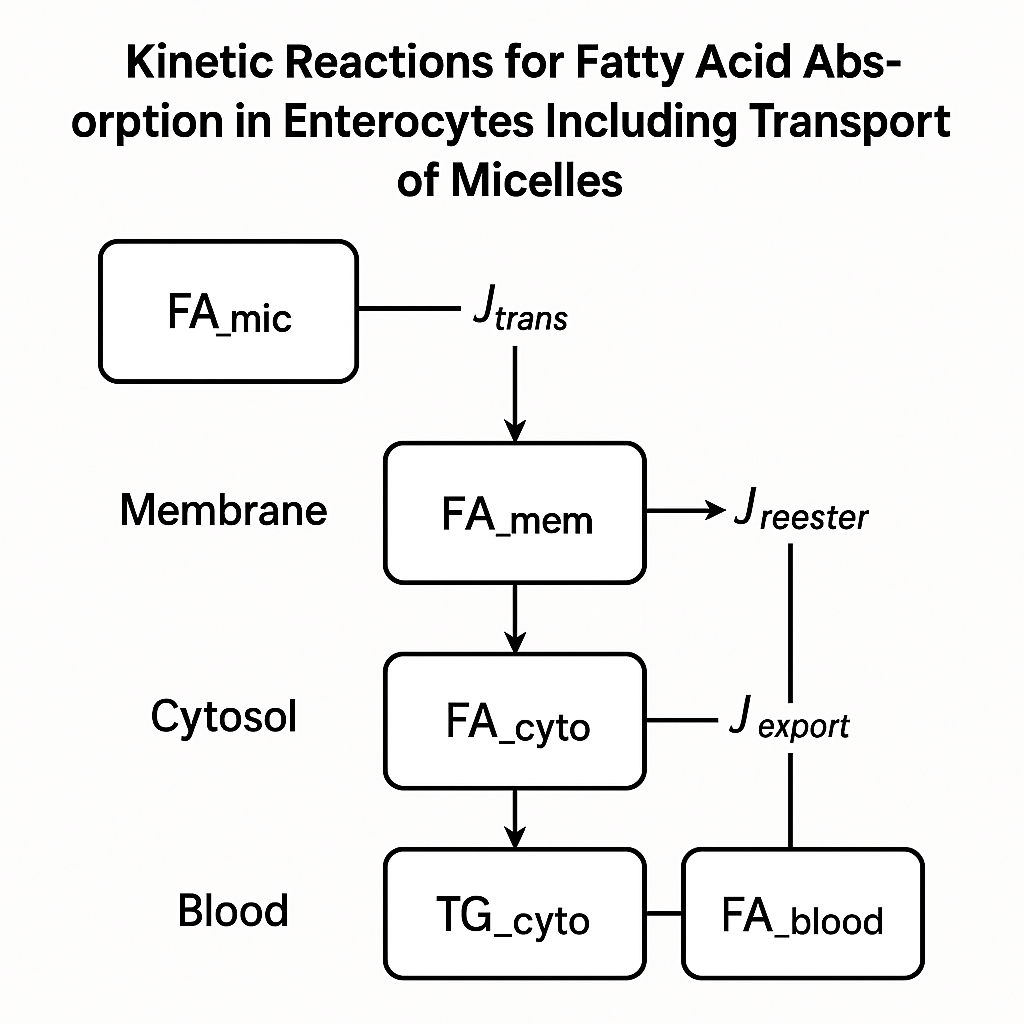